# **Class #8 Assignment: Detecting ATO Fraud Using AI/ML**

In this assignment, you'll apply supervised learning techniques to detect ATO fraud from user event logs. You’ll engineer behavioral features, train a classification model, and evaluate its performance using fraud-focused metrics like precision and recall.

---

## 📌 Instructions

Complete the tasks below in your Jupyter notebook. Be sure to include:
- Code with comments
- Markdown cells explaining your thought process
- Visualizations wherever useful

---

## ✅ Part 1 – Data Exploration & Cleaning (20 points)

- [ ] Explore the dataset using `.info()`, `.describe()`, and `.value_counts()`.
- [ ] Convert the `timestamp` column to datetime format.
- [ ] Create new time-based features like `hour_of_day` and `day_of_week`.
- [ ] Identify any missing values or inconsistencies and handle them appropriately.
- [ ] Drop or encode non-numeric identifiers like `ip_address` and `device_id` if needed.

🎯 **Goal:** Understand the structure of the dataset and prepare it for modeling.

---

## ✅ Part 2 – Feature Engineering (25 points)

- [ ] Create meaningful features that may indicate ATO activity. Examples:
  - Is the login from a new location or device?
  - Is the login followed by a sensitive action (e.g., password reset, transfer)?
  - Time since last login (if applicable)
  - Whether activity occurred during off-hours
- [ ] Use grouping or sorting logic where necessary (e.g., by `user_id` and `timestamp`).
- [ ] Document the rationale for each feature you create in markdown.

🎯 **Goal:** Capture behavioral signals of fraud using engineered variables.

---

## ✅ Part 3 – Model Training (25 points)

- [ ] Define your target variable (`is_fraud`) and feature set.
- [ ] Split the data into training and testing sets.
- [ ] Train a **Random Forest** classifier using `scikit-learn`.
- [ ] Output the top 5 most important features.

🎯 **Goal:** Build a model that can distinguish fraudulent from legitimate behavior.

---

## ✅ Part 4 – Model Evaluation (30 points)

- [ ] Generate predictions and calculate:
  - Confusion matrix
  - Precision
  - Recall
  - F1-score
  - ROC-AUC
- [ ] Use `classification_report` and `roc_auc_score` for interpretability.
- [ ] In markdown, explain:
  - What your model caught well
  - Where it made errors
  - Whether your features reflect real-world ATO behavior

🎯 **Goal:** Evaluate your model's effectiveness with fraud-sensitive metrics.

---

## 🌟 Extra Credit Challenge – Behavioral Risk Rules (50 points)

Go beyond machine learning and design a **rule-based risk scoring system** using behavioral logic.

- [ ] Assign a fraud “risk score” based on:
  - Login from a new location
  - Sensitive action (password reset, transfer) within X minutes of login
  - Off-hours activity (e.g., midnight to 5 AM)
- [ ] Add a `risk_score` column to your DataFrame.
- [ ] Plot the distribution of `risk_score` for fraud vs. non-fraud events.
- [ ] Compare this approach to your machine learning model:
  - Which catches more fraud?
  - Which creates more false positives?
- [ ] Reflect on whether these rules could help augment ML models in production systems.

🎯 **Goal:** Build explainable, fraud-inspired logic to simulate how analysts use business rules.

---

## 📤 Submission Checklist

- [ ] Completed notebook (.ipynb) with all tasks, code, and markdown explanations
- [ ] Visualizations where applicable
- [ ] Comments in code to explain logic

---

## 🧑‍🏫 Grading Rubric

| Section                        | Points |
|-------------------------------|--------|
| Part 1 – Data Exploration     | 20     |
| Part 2 – Feature Engineering  | 25     |
| Part 3 – Model Training       | 25     |
| Part 4 – Model Evaluation     | 30     |
| **Total**                     | **100** |

**Extra Credit – Behavioral Risk Modeling**: +50 points

## PART 1: DATA EXPLORATION & CLEANING

Dataset Info
Shape: (30066, 8)
Event types: {'login': 14956, 'transfer_funds': 6097, 'reset_password': 3031, 'view_balance': 3014, 'change_email': 2968}
Missing values: 0
Fraud rate: 1.19%

Cleaned dataset shape: (30066, 15)
New features created: hour_of_day, day_of_week_num, is_off_hours, is_weekend, event_type_encoded, location_encoded



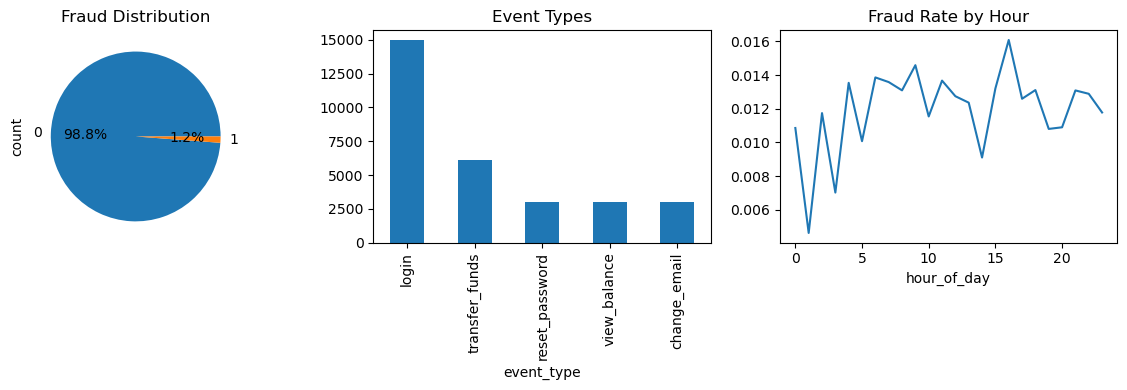


Data Exploration & Cleaning complete!


In [1]:
# =====================================
# PART 1: DATA EXPLORATION & CLEANING
# =====================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
df = pd.read_csv('ato_transactions.csv')

# Import the Markdown function from IPython.display
from IPython.display import Markdown
display(Markdown("## PART 1: DATA EXPLORATION & CLEANING"))

# 1. Explore dataset
print("Dataset Info")
print("=" * 50)
print(f"Shape: {df.shape}")
print("Event types:", df['event_type'].value_counts().to_dict())
print("Missing values:", df.isnull().sum().sum())
print(f"Fraud rate: {df['is_fraud'].mean():.2%}")

# 2. Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 3. Create time-based features
df['hour_of_day'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['day_of_week_num'] = df['timestamp'].dt.dayofweek
df['is_off_hours'] = (df['hour_of_day'] < 6).astype(int)
df['is_weekend'] = (df['day_of_week_num'] >= 5).astype(int)

# 4. Handle categorical variables
le_event = LabelEncoder()
le_location = LabelEncoder()
df['event_type_encoded'] = le_event.fit_transform(df['event_type'])
df['location_encoded'] = le_location.fit_transform(df['location'])

print(f"\nCleaned dataset shape: {df.shape}")
print("New features created: hour_of_day, day_of_week_num, is_off_hours, is_weekend, event_type_encoded, location_encoded")
df.head()
print()

# Quick visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Fraud Distribution')
plt.subplot(1, 3, 2)
df['event_type'].value_counts().plot(kind='bar', title='Event Types')
plt.subplot(1, 3, 3)
df.groupby('hour_of_day')['is_fraud'].mean().plot(title='Fraud Rate by Hour')
plt.tight_layout()
plt.show()

print(f"\nData Exploration & Cleaning complete!")

# **Observations - Dataset (ato_transactions.csv)**
- Dataset
    - Large (30,066 transactions across 8 Features)
        - Features ranged from time, user IDs, transaction activity, amount, location, etc.
    - Complete (No missing values)
        - **Insight:** No Fill-in needed
    - "Fraud rate" = 1.19%
        - **Insight:** Very low and may lead to skewed observations, poor analysis       
- Therefore, Dataset MUST be **prepared** for machine learning and model training
    - **Expanded** Identifier Values from 8 to 15 by splitting timestamp for more exact data
    - **Encoded** Descriptive (word-based) data into numeric data for easier data handling
- Dataset Visualization
    - Bar graph showed most common activity was login, followed by funds transfers, password resets
    - Line graph showed most highest fraud rate occcurred was at 4 PM, 10 AM, 4 AM, 6 AM.

In [2]:
# =====================================
# PART 2: FEATURE ENGINEERING
# =====================================

display(Markdown("## PART 2: FEATURE ENGINEERING"))

# Sort data by user and timestamp for sequential analysis
df = df.sort_values(['user_id', 'timestamp']).reset_index(drop=True)

# 1. Create user-based behavioral features
print("Creating Behavioral Features...")

# Count of unique locations per user
user_location_counts = df.groupby('user_id')['location'].nunique().to_dict()
df['user_unique_locations'] = df['user_id'].map(user_location_counts)

# Count of unique devices per user
user_device_counts = df.groupby('user_id')['device_id'].nunique().to_dict()
df['user_unique_devices'] = df['user_id'].map(user_device_counts)

# 2. Create "new location" and "new device" flags
df['is_new_location'] = 0
df['is_new_device'] = 0

for user in df['user_id'].unique():
   user_mask = df['user_id'] == user
   user_data = df[user_mask].copy()
   
   # Track seen locations and devices
   seen_locations = set()
   seen_devices = set()
   
   for idx in user_data.index:
       location = df.loc[idx, 'location']
       device = df.loc[idx, 'device_id']
       
       # Mark as new if not seen before
       if location not in seen_locations:
           df.loc[idx, 'is_new_location'] = 1
           seen_locations.add(location)
       
       if device not in seen_devices:
           df.loc[idx, 'is_new_device'] = 1
           seen_devices.add(device)

# 3. Time-based features
df['time_since_last_event'] = df.groupby('user_id')['timestamp'].diff().dt.total_seconds() / 60  # minutes
df['time_since_last_event'] = df['time_since_last_event'].fillna(0)

# 4. Sensitive action flags
sensitive_actions = ['reset_password', 'transfer_funds']
df['is_sensitive_action'] = df['event_type'].isin(sensitive_actions).astype(int)

# 5. Quick action after login flag (sensitive action within 10 minutes of login)
df['quick_sensitive_action'] = 0
for user in df['user_id'].unique():
   user_data = df[df['user_id'] == user].copy()
   
   for i in range(len(user_data) - 1):
       current_idx = user_data.index[i]
       next_idx = user_data.index[i + 1]
       
       if (df.loc[current_idx, 'event_type'] == 'login' and 
           df.loc[next_idx, 'is_sensitive_action'] == 1 and
           df.loc[next_idx, 'time_since_last_event'] <= 10):
           df.loc[next_idx, 'quick_sensitive_action'] = 1

# 6. Off-hours sensitive action
df['off_hours_sensitive'] = (df['is_off_hours'] & df['is_sensitive_action']).astype(int)

# 7. High-value transaction flag
df['is_high_value'] = (df['amount'] > df['amount'].quantile(0.9)).astype(int)

# 8. User activity frequency (events per day)
df['date'] = df['timestamp'].dt.date
user_daily_activity = df.groupby(['user_id', 'date']).size().groupby('user_id').mean().to_dict()
df['avg_daily_activity'] = df['user_id'].map(user_daily_activity)

print("Creating Behavorial Features complete!")
print("=" * 50)
print(f"Total Features: {df.shape[1]}")
print("\nNew Behavioral Features created:")
new_features = ['user_unique_locations', 'user_unique_devices', 'is_new_location', 'is_new_device', 
               'time_since_last_event', 'is_sensitive_action', 'quick_sensitive_action', 
               'off_hours_sensitive', 'is_high_value', 'avg_daily_activity']
print(new_features)

# Show feature summary
print("\nFeature Summary:")
for feature in new_features:
   if df[feature].dtype in ['int64', 'float64']:
       print(f"{feature}: mean={df[feature].mean():.3f}, std={df[feature].std():.3f}")

df[['user_id', 'timestamp', 'event_type', 'is_fraud'] + new_features].head()

print(f"\nFeature Engineering complete!")

## PART 2: FEATURE ENGINEERING

Creating Behavioral Features...
Creating Behavorial Features complete!
Total Features: 26

New Behavioral Features created:
['user_unique_locations', 'user_unique_devices', 'is_new_location', 'is_new_device', 'time_since_last_event', 'is_sensitive_action', 'quick_sensitive_action', 'off_hours_sensitive', 'is_high_value', 'avg_daily_activity']

Feature Summary:
user_unique_locations: mean=1.574, std=0.713
user_unique_devices: mean=1.668, std=0.808
is_new_location: mean=0.250, std=0.433
is_new_device: mean=0.264, std=0.441
time_since_last_event: mean=11274.834, std=12640.731
is_sensitive_action: mean=0.304, std=0.460
quick_sensitive_action: mean=0.000, std=0.012
off_hours_sensitive: mean=0.074, std=0.262
is_high_value: mean=0.100, std=0.300
avg_daily_activity: mean=1.049, std=0.096

Feature Engineering complete!


# **Observations - Data Manipulations for ATO Detection**
- **ATO Detection Mantra:** "To catch a fraudster, you must think like a fraudster"
    - Knowledge of common fraud tactics should help Fraud analysts determine what features to "engineer"
        - **Typical Sequence of ATO:** login → check balance → reset credentials → transfer funds
        - **ATO Red Flags:** Exotic locations, Timezone differences, Multiple login attempts, New devices
- Understanding ATO **influenced** what Features to create and/or expand
    - Increased Features from basic (15 in Part 1) to advanced (26 in Part 2)
    - 10 new **Behavioral Features** added to dataset
        - **Insight:** Marriage of Man & Machine, **There is no AI model without a human analyst's mind & experience behind it**

In [3]:
# =====================================
# PART 3: MODEL TRAINING
# =====================================

display(Markdown("## PART 3: MODEL TRAINING"))

# Define target variable and feature set
target = 'is_fraud'
features_to_exclude = ['user_id', 'timestamp', 'event_type', 'ip_address', 'location', 'device_id', 'day_of_week', 'date']
feature_columns = [col for col in df.columns if col not in features_to_exclude + [target]]

X = df[feature_columns]
y = df[target]

print("Model Training Setup")
print("=" * 50)
print(f"Target variable: {target}")
print(f"Number of Features: {len(feature_columns)}")
print(f"Features used: {feature_columns}")
print(f"Dataset shape - X: {X.shape}, y: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Train Fraud Rate: {y_train.mean():.2%}, Test Fraud Rate: {y_test.mean():.2%}")

# Train Random Forest Model classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

print("\nRandom Forest Model trained successfully!")

# Get feature importance
feature_importance = pd.DataFrame({
   'feature': feature_columns,
   'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n5 Most Important Features:")
print(feature_importance.head())

print(f"\nModel Training complete!")

## PART 3: MODEL TRAINING

Model Training Setup
Target variable: is_fraud
Number of Features: 17
Features used: ['amount', 'hour_of_day', 'day_of_week_num', 'is_off_hours', 'is_weekend', 'event_type_encoded', 'location_encoded', 'user_unique_locations', 'user_unique_devices', 'is_new_location', 'is_new_device', 'time_since_last_event', 'is_sensitive_action', 'quick_sensitive_action', 'off_hours_sensitive', 'is_high_value', 'avg_daily_activity']
Dataset shape - X: (30066, 17), y: (30066,)

Train set: (21046, 17), Test set: (9020, 17)
Train Fraud Rate: 1.19%, Test Fraud Rate: 1.20%

Random Forest Model trained successfully!

5 Most Important Features:
                  feature  importance
5      event_type_encoded    0.229285
12    is_sensitive_action    0.136119
11  time_since_last_event    0.125761
1             hour_of_day    0.101849
0                  amount    0.090122

Model Training complete!


# **Observations - Model Training Using Engineered Features**
- Random Forest Model training utilized using Engineered Features
    - **Target Feature** was "is_fraud" (0 = Legitimate Transaction, 1 = Fraudulent Transaction)
    - **Training Split** used was 70% Training/30% Test
    - **Fraud Rate** maintained across Training and Test sets (1.19%)
        - Stratified dataset to maintain fraud rate and ensure efficient training 
    - **Excluded** 9 of total 26 Features for being too specific or too broad (i.e., "user_id", "ip_address", "timestamp"), in addition to Target Feature
        - **Insight:** More meaningful training if using behavorial, numeric values
        - **Insight:** Training models can't use data for New Users, Devices, Locations Data because ML memorizes instead of learning from
- **5 Most Important Features**
    - **Insight:** "event_type_encoded" was **MOST** important feature in identifying ATO
    - **Insight:** 4 of 5 Most Important Features were engineered or prepared (in Part 1 & 2)

## PART 4: MODEL EVALUATION

Model Evaluation Results
Precision: 1.000
Recall: 0.009
F1-Score: 0.018
ROC-AUC: 0.727

Detailed Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.99      1.00      0.99      8912
  Fraudulent       1.00      0.01      0.02       108

    accuracy                           0.99      9020
   macro avg       0.99      0.50      0.51      9020
weighted avg       0.99      0.99      0.98      9020


Confusion Matrix:
[[8912    0]
 [ 107    1]]


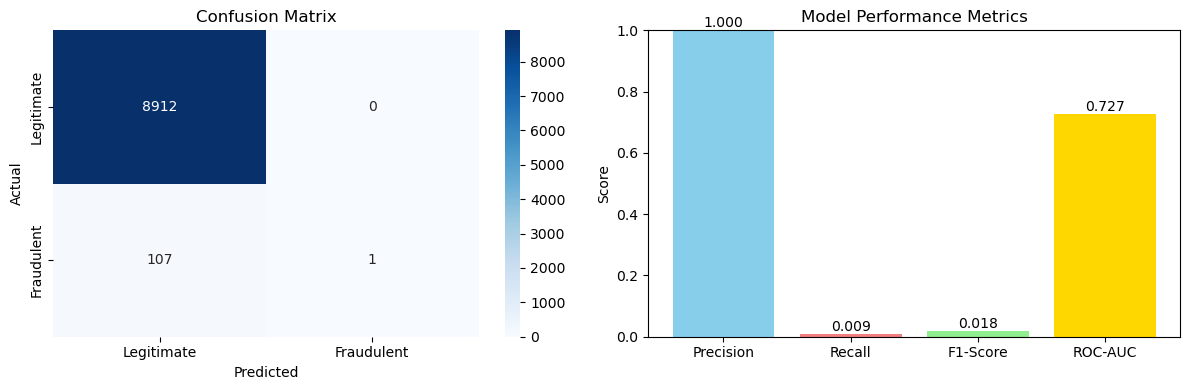


Model Evaluation complete!


In [4]:
# =====================================
# PART 4: MODEL EVALUATION
# =====================================

display(Markdown("## PART 4: MODEL EVALUATION"))

# Generate predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of fraud class

print("Model Evaluation Results")
print("=" * 50)

# Calculate Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Classification Report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraudulent']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Legitimate', 'Fraudulent'], 
           yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [precision, recall, f1, roc_auc]
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(values):
   plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

print(f"\nModel Evaluation complete!")

# **Observations - Model Results & Analysis**
- **Performance Breakdown:**
    - **True Negatives** (Correctly identified as Legitimate): 8912
    - **False Positives** (Incorrectly identified as Fraudulent): 0
    - **False Negatives** (Incorrectly identified as Legitimate): 107
    - **True Positives** (Correctly identified as Fraudulent): 1

## **Performance Metrics**
- "Precision" = 1.000 = True Positive/(True Positive + False Positive)
    - Of all transactions flagged as fraud, 100% were actually fraud; 0% were falsely flagged (false positives)
- "Recall" = .009 = True Positive/(True Positive + False Negative)
    - Of all Fraudulent transactions, .93% were correctly identified as fraud; 99.17% of Fraudulent transactions were not identified (false negatives)
- "F-1 Score" = .018 = 2 * (Precision * Recall)/(Precision + Recall)
- "ROC-AUC" = 72.7%
- **Insight:** Precision is excellent while Recall is extremely low, raising concerns about high failure rate of incorrectly identifying Fraudulent transactions (false negatives)
- **Insight:** Low Recall affects F-1 Score, leading to conclusion that improvements can be made by balancing data (i.e., engineering new features) or editing model parameters (i.e., 'n_estimators', 'max_depth')
- **Insight:** ROC-AUC shows moderate ability to distinguish between Fraudulent and Legitimate transactions - better than guessing randomly but needs improvement
- **Insight:** High Precision (better customer experience) v. Low Recall (missing Fraudulent transactions) must be considered
    - **Insight:** Highly dependant on goals and risk tolerance (Higher satisfaction v. Lower identification) 
- **Insight:** ATO behavior is highly likely to mimic Legitimate behaviors, thus actual Fraudulent transactions can be easily missed

## **Detailed Classification Report**
- "Support" = Actual count of each transaction class in test set: 8,912 Legitimate transactions v. 108 Fraudulent transactions
- "Macro avg" = Simple average across both classes (99% precision, 50% recall)
    - Treats Fraudulent and Legitimate transactions equally, revealing poor Recall ability
        - **Insight:** Not necessarily the most accurate recall value as there was just 1 transaction
- "Weighted avg" = Size-weighted average (99% precision, 99% recall)
    - Legitimate transactions data greatly outweighs Fraudulent transactions data
        - **Insight:** May skew results to show model is performing better than it truly is

## **Confusion Matrix**
- Model incorrectly identified 107 Fraudulent transactions as Legitimate transactions
    - **Poor** rate (99.17%) of False Negatives 
- Model incorrrectly identified 0 Legitimate transactions as Fraudulent transactions
    - **Excellent** rate (0%) of False Positives